### Score: `[55]`

1.1 `[16.5]` Great job!

1.2 `[22]` Great job!

1.3 `[5.5]` Good job!

[Bonus] `[11]`

各题批注用`### Note`给出，请自行查阅。

In [39]:
# fossil_fuel_burning_rate
import pandas as pd

# Read the data and split by whitespace
file_path = 'global.1751_2014.ems'
data = pd.read_csv(file_path, skiprows=33, delim_whitespace=True)  # Data starts from row 33 (row 33 contains column names)

# Extract data from 1987 to 2004
ffb = data[(data['Year'] >= 1987) & (data['Year'] <= 2004)]

# Print the first few rows of the data
print(ffb)


     Year  Total   Gas  Liquids  Solids  Production  Flaring  Capita
236  1987   5725   892     2306    2339         143       44    1.14
237  1988   5936   935     2412    2387         152       50    1.16
238  1989   6066   982     2459    2428         156       41    1.16
239  1990   6074  1026     2492    2359         157       40    1.14
240  1991   6142  1051     2601    2284         161       45    1.14
241  1992   6078  1085     2499    2290         167       36    1.11
242  1993   6070  1117     2515    2225         176       37    1.09
243  1994   6174  1133     2539    2278         186       39    1.09
244  1995   6305  1151     2560    2359         197       39    1.10
245  1996   6448  1198     2626    2382         203       40    1.11
246  1997   6556  1197     2701    2409         209       40    1.11
247  1998   6576  1224     2763    2343         209       36    1.10
248  1999   6561  1258     2741    2310         217       35    1.08
249  2000   6733  1289     2845   

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_5976\1644275094.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows=33, delim_whitespace=True)  # Data starts from row 33 (row 33 contains column names)


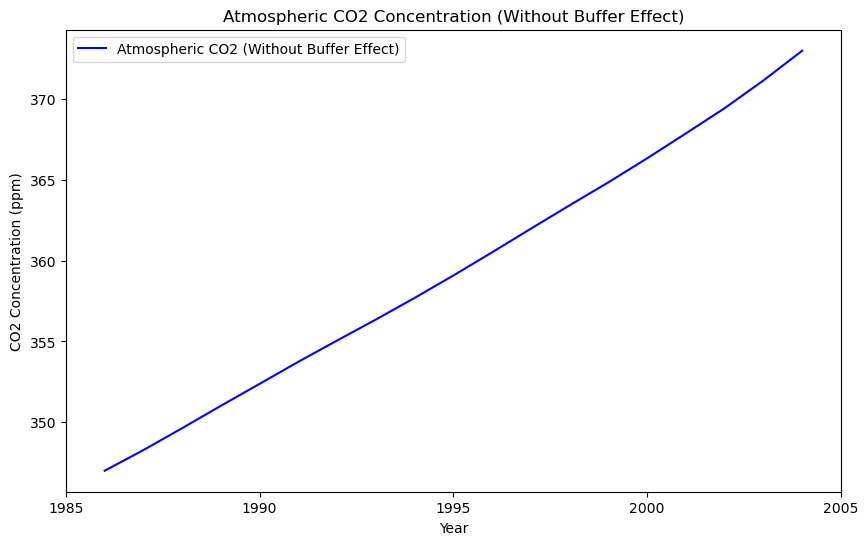

In [58]:
# Euler's method for integration
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions (1986)

# Parameter settings
k12 = 105 / 740
k21 = 102 / 900
k = 740 / 347 # CONVERSE ppm to Pgc

# Linear interpolation function: returns the corresponding combustion rate by year
def fossil_fuel_burning_rate(t):
    # Interpolation function using pandas
    return np.interp(t, ffb['Year'], ffb['Total']/1000/k)

# System of differential equations
def carbon_cycle(t, N1, N2):
    gamma = fossil_fuel_burning_rate(t)
    dN1_dt = -k12 * N1 + k21 * N2 + gamma
    dN2_dt = k12 * N1 - k21 * N2
    return dN1_dt, dN2_dt
    

N1_0 = 740/k  # 740PgC
N2_0 = 900/k # 900PgC = 422 ppm 


# Time span from 1987 to 2004 (rounded years)
years = np.arange(1987, 2005)

# Results storage
N1_vals = [N1_0]
N2_vals = [N2_0]
time_points = [1986]  # From 1986

# Euler's method for integration
for t in years:
    dN1_dt, dN2_dt = carbon_cycle(t, N1_vals[-1], N2_vals[-1])
    N1_new = N1_vals[-1] + dN1_dt  # UpdateN1
    N2_new = N2_vals[-1] + dN2_dt  # UpdateN2
    N1_vals.append(N1_new)
    N2_vals.append(N2_new)
    time_points.append(t)

# Convert to array
Without = np.array(N1_vals)
time_points = np.array(time_points)

# Plot the results (only atmospheric CO2)
plt.figure(figsize=(10, 6))
plt.plot(time_points, Without, label='Atmospheric CO2 (Without Buffer Effect)', color='blue') ### Note: CO$_2$，注意标题下标小写更好~
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (Without Buffer Effect)')
plt.xticks(np.arange(1985, 2006, 5))  # Set up the x-axis to show a point every 5 years
plt.legend()
plt.show()

#偏小

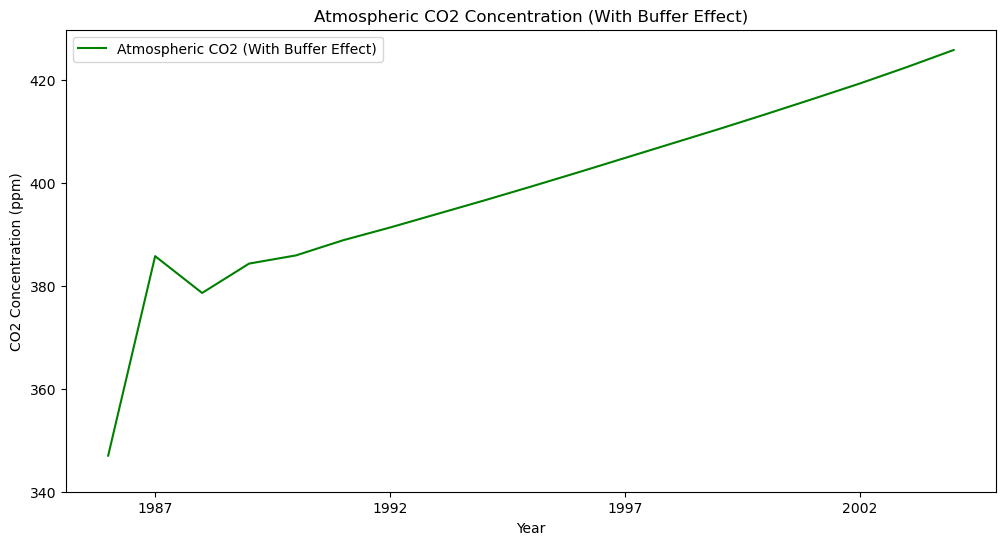

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Initial conditions (1986)

# Parameter settings
k = 740 / 347 # CONVERSE ppm to Pgc
k12 = 105 / 740
k21 = 102 / 900
N2_prime = 821/k  #900-81=821 PgC N2' 


# Linear interpolation function: returns the corresponding combustion rate by year
def fossil_fuel_burning_rate(t):
    return np.interp(t, ffb['Year'], ffb['Total']/1000/k)



# System of differential equations(With Buffer Effect)
def carbon_cycle_with_buffer(t, N1, N2):
    gamma = fossil_fuel_burning_rate(t)
    dN1_dt = -k12 * N1 + k21 * (N2_prime + (3.69 + 0.0186 * N1 - 0.0000018 * N1**2) * (N2 - N2_prime)) + gamma
    dN2_dt = k12 * N1 - k21 * (N2_prime + (3.69 + 0.0186 * N1 - 0.0000018 * N1**2) * (N2 - N2_prime))
    return dN1_dt, dN2_dt
    

N1_0 = 347  # 740PgC
N2_0 = 422 # 900PgC = 422 ppm 


# Time span from 1987 to 2004 (rounded years)
years = np.arange(1987, 2005)


# Results storage
N1_vals = [N1_0]
N2_vals = [N2_0]
time_points = [1986]  # From 1986

# Euler's method for integration
for t in years:
    dN1_dt, dN2_dt = carbon_cycle_with_buffer(t, N1_vals[-1], N2_vals[-1])
    N1_new = N1_vals[-1] + dN1_dt  # UpdateN1
    N2_new = N2_vals[-1] + dN2_dt  # UpdateN2
    N1_vals.append(N1_new)
    N2_vals.append(N2_new)
    time_points.append(t)

# Convert to array
With = np.array(N1_vals)
time_points = np.array(time_points)


plt.figure(figsize=(12, 6))
plt.plot(time_points, With, label='Atmospheric CO2 (With Buffer Effect)', color='green')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (With Buffer Effect)')
plt.yticks(np.arange(340, 430, 20)) # Set the y-axis to display a point every 20 ppm
plt.xticks(np.arange(1987, 2006, 5)) # Set up the x-axis to show a point every 5 years
plt.legend()
plt.grid(False)
plt.show()

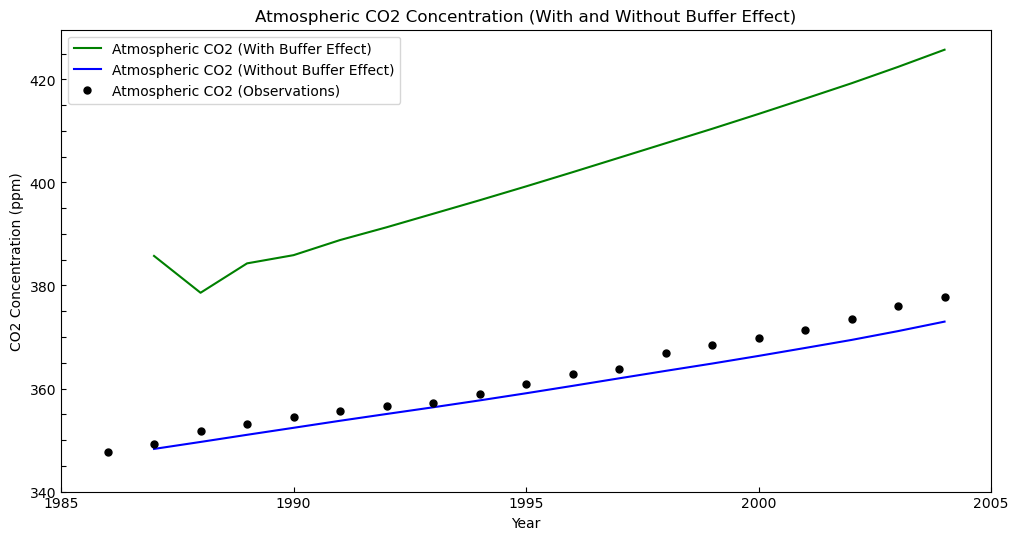

In [42]:
import pandas as pd

# Read the CSV file, skipping the first 43 lines of invalid data
df = pd.read_csv('co2_annmean_mlo.csv', skiprows=43)

# Extraction of data from 1987 to 2003
df_observations = df[(df['year'] >= 1986) & (df['year'] <= 2004)]

plt.figure(figsize=(12, 6))

# Plotting data with and without buffer effects
plt.plot(time_points[1:], With[1:], label='Atmospheric CO2 (With Buffer Effect)', color='green')
plt.plot(time_points[1:], Without[1:], label='Atmospheric CO2 (Without Buffer Effect)', color='blue')
plt.plot(df_observations['year'], df_observations['mean'], label='Atmospheric CO2 (Observations)', color='black', marker='o', linestyle='', markersize=5)



# Set x- and y-axis labels and titles
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration (With and Without Buffer Effect)')

# Set the y-axis scale: one scale for every 5 ppm and display values for every 20 ppm
plt.yticks(np.arange(340, 430, 5))  # Scale every 5 ppm
plt.gca().set_yticklabels([f'{i}' if i % 20 == 0 else '' for i in np.arange(340, 430, 5)])  # Labels displayed every 20 ppm

# Set x-axis scale: from 1985 to 2005 in 5-year steps, showing only multiples of 5 (1985, 1990, 1995, 2000)
plt.xticks(np.arange(1985, 2006, 5)) 

# Setting scale facing inward
plt.tick_params(axis='both', direction='in')

plt.legend()

plt.grid(False)

plt.show()


In [43]:
#fossil_fuel_burning_rate
import pandas as pd

# Reading data and separating it by spaces
file_path = 'global.1751_2014.ems'
data = pd.read_csv(file_path, skiprows = 33 , delim_whitespace=True)# Valid data from row 33 onwards 
# Extraction of data from 1751 to 2004
ffb_1751 = data[(data['Year'] >= 1751) & (data['Year'] <= 2004)]

# check data
#print(ffb_1751)

file_path_land = 'Global_land-use_flux-1850_2005.csv'
data_land = pd.read_csv(file_path_land )

data1 = pd.read_csv('lawdome.combined.dat', skiprows = 270, delim_whitespace=True)# Valid data from row 270 onwards 
data1 = data1.drop(columns=data1.columns[2])  # 删除第三列
data1.rename(columns={data1.columns[1]: 'ppm'}, inplace=True)  # 将第二列命名为'ppm'
# Extraction of data from 1750 to 2004
data_observations_ice_core = data1[(data1['year'] >= 1750)&(data1['year'] <= 1955)]
data2 = pd.read_csv('Record derived from a spline smoothing (20 year cutoff) of the DE08 and DE08-2 data (as in figure 5 of Etheridge et al. 1996).csv', skiprows = 3)# Valid data from row 3 onwards 
data_obs_new = data2[(data2['year A.D.'] > 1955)]

#check data
#print(data_land)
#print(data_observations)
data1

C:\Users\zhangchen\AppData\Local\Temp\ipykernel_5976\3928657030.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, skiprows = 33 , delim_whitespace=True)# Valid data from row 33 onwards
C:\Users\zhangchen\AppData\Local\Temp\ipykernel_5976\3928657030.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv('lawdome.combined.dat', skiprows = 270, delim_whitespace=True)# Valid data from row 270 onwards


,year,ppm
0,1010,279.5
1,1015,279.6
2,1020,279.7
3,1025,279.8
4,1030,279.9
...,...,...
189,1955,314.1
190,1960,316.9
191,1965,320.5
192,1970,324.7


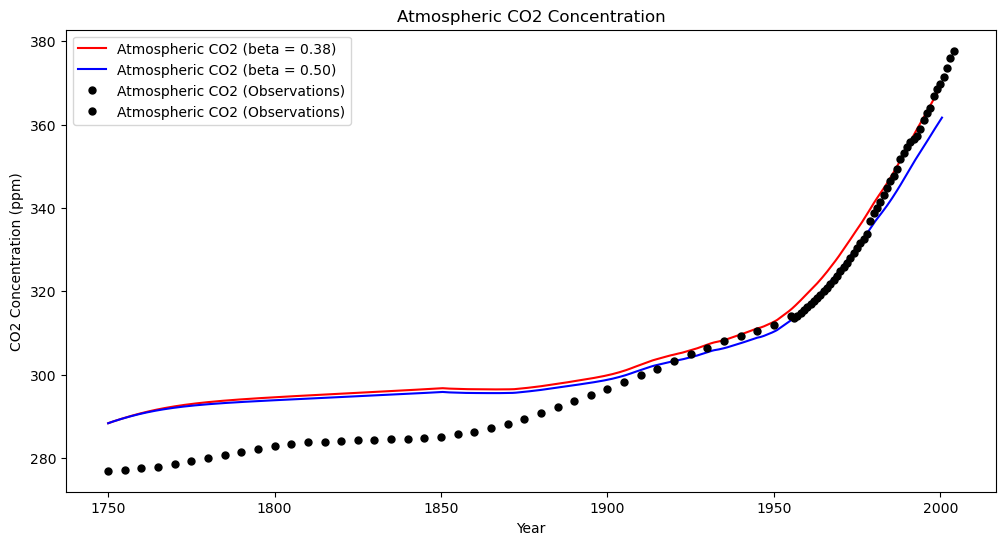

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 740 / 347  # CONVERSE ppm to Pgc
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1238 ### Note: 应为1328, PS5_2同理

# Constants (assumed values)
N2_prime = 842 / k  # 842

# Parameters for f (function)
f0 = 62 / k  
beta1 = 0.38
beta2 = 0.50
P0 = 288.38 

def land_use_change(t):
    # 对于 1750 < t < 1850，执行线性插值
    if 1750 <= t <=1850:
        # 计算插值系数，线性插值从0.2到0.5
        delta = 0.2 + (t - 1750) * (0.5 - 0.2) / (1850 - 1750)/ k
        return delta
    elif t >= 1850:
        # 对于 t > 1850，直接使用 data_land 数据
        delta = data_land.loc[data_land['Year'] == int(t), 'Global'].values[0] / 1000 / k
        return delta

# Linear interpolation function for fossil fuel burning rate
def fossil_fuel_burning_rate(t):
    return np.interp(t, ffb_1751['Year'], ffb_1751['Total'] / 1000 / k)

def a(N1):
    # This is consistent with putting into the expression dN1_dt to integrate the answer
    return 3.69 + 0.0186 * N1 - 0.0000018 * N1**2

# Function for calculating f using equation (5)
def calculate_f(N1):
    P = N1  
    return f0 * (1 + beta1 * np.log(P / P0))

# Differential equations
def system(t, y):
    N1, N2, N3, N4, N5, N6, N7 = y

    delta = land_use_change(t)

    gamma = fossil_fuel_burning_rate(t)
    
    a_val = a(N1)  # 计算 'a' 作为N1的函数
    
    f = calculate_f(N1)

    
    # Equation (6) dN1/dt
    dN1_dt = -k12 * N1 + k21 * (N2_prime + a_val * (N2 - N2_prime)) + gamma - f + delta + k51 * N5 + k71 * N7
    
    # Equation (7) dN2/dt
    dN2_dt = k12 * N1 - k21 * (N2_prime + a_val * (N2 - N2_prime)) - k23 * N2 + k32 * N3 - k24 * N2
    
    # Equation (8) dN3/dt
    dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
    
    # Equation (9) dN4/dt
    dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
    
    # Equation (10) dN5/dt
    dN5_dt = k45 * N4 - k51 * N5
    
    # Equation (11) dN6/dt
    dN6_dt = f - k67 * N6 - 2 * delta
    
    # Equation (12) dN7/dt
    dN7_dt = k67 * N6 - k71 * N7 + delta

    return [dN1_dt, dN2_dt, dN3_dt, dN4_dt, dN5_dt, dN6_dt, dN7_dt]

# Initial conditions
N1_0 = 615 / k  # Initial CO2 concentration 615 PgC   
N2_0 = 842 / k  # Initial concentration for 842 PgC 
N3_0 = 9744 / k  # Initial concentration for N3
N4_0 = 26280 / k  # Initial concentration for N4
N5_0 = 90000000 / k  # Initial concentration for N5
N6_0 = 731 / k  # Initial concentration for N6
N7_0 = 1238 / k  # Initial concentration for N7

# Initial state vector
y0 = [N1_0, N2_0, N3_0, N4_0, N5_0, N6_0, N7_0]

# Time span (from 1750 to 2001) and step size
start_year = 1750
end_year = 2001
dt = 0.5  # Time step (0.5 years)
years = np.arange(start_year, end_year, dt)

# Results storage
results = np.zeros((len(years), 7))
results[0] = y0



# Integration using Euler's method
for i in range(1, len(years)):
    t = years[i-1]
    y = results[i-1]
    dydt = system(t, y)
    
    # Update the state variables using Euler's method
    results[i] = y + np.array(dydt) * dt

# Extract the result for N1 (atmospheric CO2)
N1_result_1 = results[:, 0] #beta = 0.38


''' Repeat for beta2.'''


# Function for calculating f using equation (5)
def calculate_f(N1):
    P = N1  
    return f0 * (1 + beta2 * np.log(P / P0))

# Differential equations
def system(t, y):
    N1, N2, N3, N4, N5, N6, N7 = y

    delta = land_use_change(t)

    gamma = fossil_fuel_burning_rate(t)
    
    a_val = a(N1)  # 计算 'a' 作为N1的函数
    
    f = calculate_f(N1)

    
    # Equation (6) dN1/dt
    dN1_dt = -k12 * N1 + k21 * (N2_prime + a_val * (N2 - N2_prime)) + gamma - f + delta + k51 * N5 + k71 * N7
    
    # Equation (7) dN2/dt
    dN2_dt = k12 * N1 - k21 * (N2_prime + a_val * (N2 - N2_prime)) - k23 * N2 + k32 * N3 - k24 * N2
    
    # Equation (8) dN3/dt
    dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
    
    # Equation (9) dN4/dt
    dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
    
    # Equation (10) dN5/dt
    dN5_dt = k45 * N4 - k51 * N5
    
    # Equation (11) dN6/dt
    dN6_dt = f - k67 * N6 - 2 * delta
    
    # Equation (12) dN7/dt
    dN7_dt = k67 * N6 - k71 * N7 + delta

    return [dN1_dt, dN2_dt, dN3_dt, dN4_dt, dN5_dt, dN6_dt, dN7_dt]
    
# Results storage
RResults = np.zeros((len(years), 7))
RResults[0] = y0
# Integration using Euler's method
for i in range(1, len(years)):
    t = years[i-1]
    y = RResults[i-1]
    dydt = system(t, y)
    
    # Update the state variables using Euler's method
    RResults[i] = y + np.array(dydt) * dt

N1_result_2 = RResults[:, 0] #beta = 0.5


# Plot the result for atmospheric CO2 concentration (N1)
plt.figure(figsize=(12, 6))
plt.plot(years, N1_result_1, label="Atmospheric CO2 (beta = 0.38)", color='red')
plt.plot(years, N1_result_2, label="Atmospheric CO2 (beta = 0.50)", color='blue')
plt.plot(data_observations_ice_core['year'], data_observations_ice_core['ppm'], label='Atmospheric CO2 (Observations)', color='black', marker='o', linestyle='', markersize=5)
plt.plot(data_obs_new['year A.D.'], data_obs_new['ppm'], label='Atmospheric CO2 (Observations)', color='black', marker='o', linestyle='', markersize=5)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration')
plt.grid(False)
plt.legend()
plt.show()

In [45]:
#check With
print(With)

[347.         385.72834703 378.58094247 384.28316207 385.87743133
 388.80870631 391.28544237 393.90407289 396.52608849 399.22148822
 401.9750567  404.77699306 407.58587091 410.39040399 413.27840216
 416.23369447 419.23335453 422.41082944 425.74306246]


In [46]:
#check Without
print(Without)

[347.         348.27780405 349.6326724  351.01816726 352.37617262
 353.74226477 355.05609627 356.35386358 357.69176046 359.07773263
 360.51209898 361.97369554 363.42004717 364.83969549 366.32634654
 367.86641328 369.42709954 371.14027647 372.98029188]
